In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from astropy.io import fits
import cv2

In [74]:
model = tf.keras.models.load_model('D:/Bates_Lomax_Whitworth_Paper/BWL_CNN.model')

In [75]:
IMG_PATH = 'D:/Hi-GalTiles/FitsFiles/Cutout_l217'
print(os.listdir(IMG_PATH))

['Cutout_Reprojected_l217_cdens.fits', 'Cutout_Reprojected_l217_PACS_160.fits', 'Cutout_Reprojected_l217_PACS_70.fits', 'Cutout_Reprojected_l217_SPIRE_250.fits', 'Cutout_Reprojected_l217_SPIRE_350.fits', 'Cutout_Reprojected_l217_SPIRE_500.fits', 'Cutout_Reprojected_l217_temp.fits']


In [76]:
file_no = 2
fits_file = fits.open(os.path.join(IMG_PATH,os.listdir(IMG_PATH)[file_no]))
fits_file.info()

Filename: D:/Hi-GalTiles/FitsFiles/Cutout_l217\Cutout_Reprojected_l217_PACS_70.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   (1115, 1115)   float64   


In [77]:
hdu = fits_file[0]

C:\Users\C1764397\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


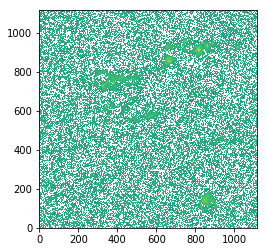

In [78]:
plt.imshow(np.log10(hdu.data),origin='lower')

In [79]:
image_data = hdu.data

In [80]:
image_data[np.where(np.isnan(image_data))] = np.min(np.nan_to_num(image_data))
image_data = image_data - np.min(image_data)
image_data[np.where(image_data == 0)] = np.sort(image_data.flatten()[np.where((image_data).flatten()!=0)])[0]/2

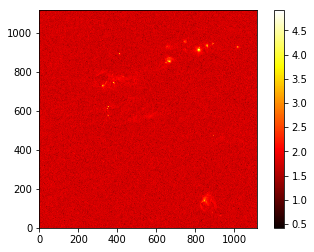

In [81]:
plt.imshow(np.log10(image_data),origin='lower',cmap='hot')
plt.colorbar()

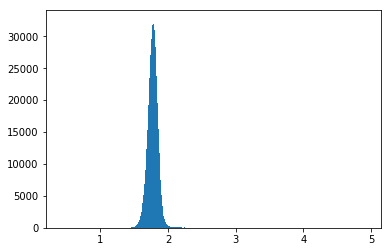

In [82]:
plt.hist(np.log10(image_data.flatten()),bins=1000)
plt.show()

In [83]:
IMG_SIZE = 128

In [84]:
resized_img = cv2.resize(image_data, (IMG_SIZE,IMG_SIZE))

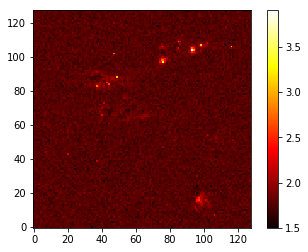

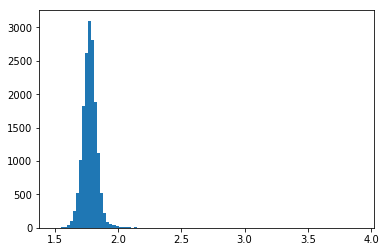

In [85]:
plt.imshow(np.log10(resized_img),origin='lower',cmap='hot')
plt.colorbar()
plt.show()

plt.figure()
plt.hist(np.log10(resized_img).flatten(),bins=100)
plt.show()

In [86]:
m_1_field = np.mean(resized_img)
s_1_field = np.std(resized_img)
m_2_field = 0
s_2_field = 1/4

In [87]:
resized_img = resized_img*s_2_field/s_1_field
resized_img = resized_img+(m_2_field-m_1_field*s_2_field/s_1_field)

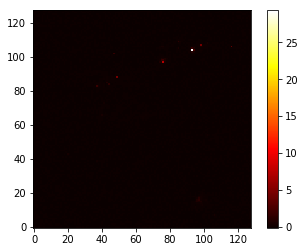

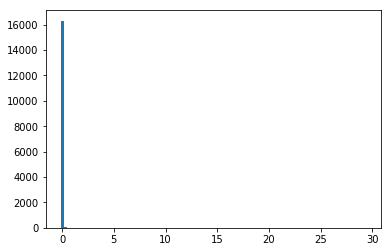

In [89]:
plt.imshow(resized_img,origin='lower',cmap='hot')
plt.colorbar()
plt.show()

plt.figure()
plt.hist(resized_img.flatten(),bins=100)
plt.show()

In [90]:
resized_img[np.where(resized_img>1.)] = 1.
resized_img[np.where(resized_img<-1.)] = -1.

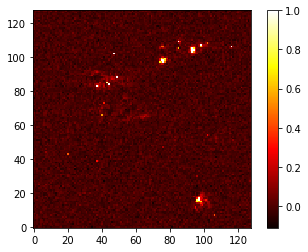

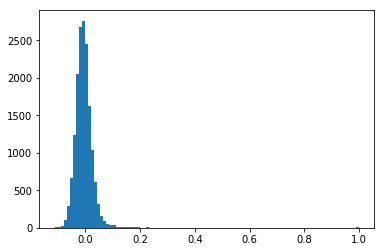

In [91]:
plt.imshow(resized_img,origin='lower',cmap='hot')
plt.colorbar()
plt.show()

plt.figure()
plt.hist(resized_img.flatten(),bins=100)
plt.show()

In [92]:
X = np.array(resized_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [94]:
prediction = model.predict(X)
H = prediction[0][0]
sigma = prediction[1][0]

print(H,sigma)

[0.06723922] [1.5573611]
